# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

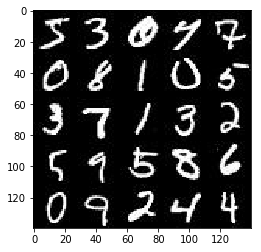

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

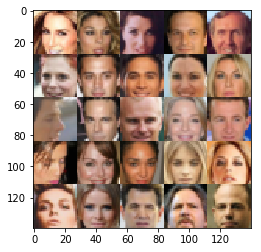

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/Liu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        
        # Input layer 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1) # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)  # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3) # 4x4x256
        
        # Flatten
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
        
        # 1st fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1) # 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2) # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3) # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 4, strides=2, padding='same') # 28x28xout_channel_dim    
        
        out = tf.tanh(logits)
        
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Update weights and bias
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1               
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images *= 2
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: 0.001})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate: 0.001})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    _ = show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 0.8044
Epoch 1/2... Discriminator Loss: 2.7251... Generator Loss: 12.8685
Epoch 1/2... Discriminator Loss: 1.0932... Generator Loss: 0.7376
Epoch 1/2... Discriminator Loss: 3.6802... Generator Loss: 0.1176
Epoch 1/2... Discriminator Loss: 4.4250... Generator Loss: 7.3038
Epoch 1/2... Discriminator Loss: 3.1733... Generator Loss: 6.0159
Epoch 1/2... Discriminator Loss: 2.3913... Generator Loss: 2.6787
Epoch 1/2... Discriminator Loss: 1.6606... Generator Loss: 1.2043
Epoch 1/2... Discriminator Loss: 0.7320... Generator Loss: 0.9880
Epoch 1/2... Discriminator Loss: 1.3856... Generator Loss: 2.0109


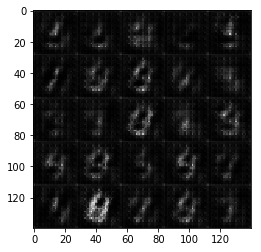

Epoch 1/2... Discriminator Loss: 1.3953... Generator Loss: 0.9841
Epoch 1/2... Discriminator Loss: 1.8382... Generator Loss: 1.6616
Epoch 1/2... Discriminator Loss: 1.5679... Generator Loss: 1.7846
Epoch 1/2... Discriminator Loss: 1.4087... Generator Loss: 1.4755
Epoch 1/2... Discriminator Loss: 1.5266... Generator Loss: 1.5990
Epoch 1/2... Discriminator Loss: 1.5293... Generator Loss: 1.5798
Epoch 1/2... Discriminator Loss: 2.1376... Generator Loss: 0.1720
Epoch 1/2... Discriminator Loss: 1.6952... Generator Loss: 0.2887
Epoch 1/2... Discriminator Loss: 1.6605... Generator Loss: 0.3374
Epoch 1/2... Discriminator Loss: 1.9363... Generator Loss: 0.2000


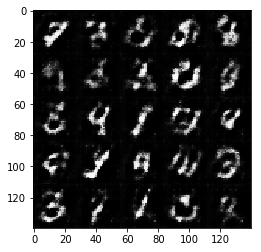

Epoch 1/2... Discriminator Loss: 1.5787... Generator Loss: 0.3510
Epoch 1/2... Discriminator Loss: 1.4420... Generator Loss: 0.3759
Epoch 1/2... Discriminator Loss: 1.6764... Generator Loss: 0.2739
Epoch 1/2... Discriminator Loss: 1.5292... Generator Loss: 0.3516
Epoch 1/2... Discriminator Loss: 1.6144... Generator Loss: 0.3971
Epoch 1/2... Discriminator Loss: 1.3617... Generator Loss: 0.8790
Epoch 1/2... Discriminator Loss: 1.6102... Generator Loss: 1.1244
Epoch 1/2... Discriminator Loss: 1.3978... Generator Loss: 0.8934
Epoch 1/2... Discriminator Loss: 1.5741... Generator Loss: 1.3953
Epoch 1/2... Discriminator Loss: 1.3252... Generator Loss: 0.7743


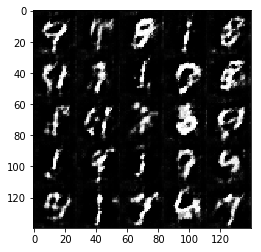

Epoch 1/2... Discriminator Loss: 1.4374... Generator Loss: 0.3822
Epoch 1/2... Discriminator Loss: 1.7454... Generator Loss: 0.2696
Epoch 1/2... Discriminator Loss: 1.5127... Generator Loss: 0.3770
Epoch 1/2... Discriminator Loss: 1.6332... Generator Loss: 0.3004
Epoch 1/2... Discriminator Loss: 1.3895... Generator Loss: 0.6197
Epoch 1/2... Discriminator Loss: 1.5662... Generator Loss: 0.3663
Epoch 1/2... Discriminator Loss: 1.4582... Generator Loss: 0.3486
Epoch 1/2... Discriminator Loss: 1.5468... Generator Loss: 0.3602
Epoch 1/2... Discriminator Loss: 1.3820... Generator Loss: 0.4802
Epoch 1/2... Discriminator Loss: 1.6040... Generator Loss: 0.2976


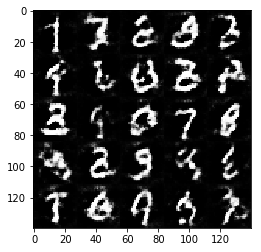

Epoch 1/2... Discriminator Loss: 1.8263... Generator Loss: 0.2642
Epoch 1/2... Discriminator Loss: 1.3665... Generator Loss: 0.4533
Epoch 1/2... Discriminator Loss: 1.2297... Generator Loss: 0.6714
Epoch 1/2... Discriminator Loss: 2.0080... Generator Loss: 1.8248
Epoch 1/2... Discriminator Loss: 1.2947... Generator Loss: 1.1461
Epoch 1/2... Discriminator Loss: 1.4909... Generator Loss: 1.4063
Epoch 1/2... Discriminator Loss: 1.2644... Generator Loss: 1.0476
Epoch 1/2... Discriminator Loss: 1.7157... Generator Loss: 1.5227
Epoch 1/2... Discriminator Loss: 1.4011... Generator Loss: 1.1490
Epoch 1/2... Discriminator Loss: 1.4195... Generator Loss: 0.4928


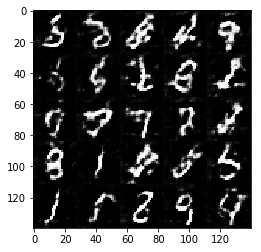

Epoch 1/2... Discriminator Loss: 1.4889... Generator Loss: 0.3841
Epoch 1/2... Discriminator Loss: 1.5067... Generator Loss: 0.3237
Epoch 1/2... Discriminator Loss: 1.5908... Generator Loss: 0.3110
Epoch 1/2... Discriminator Loss: 1.4202... Generator Loss: 0.4736
Epoch 1/2... Discriminator Loss: 1.4173... Generator Loss: 0.4426
Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 0.5405
Epoch 1/2... Discriminator Loss: 1.3757... Generator Loss: 1.0918
Epoch 1/2... Discriminator Loss: 1.4744... Generator Loss: 1.4080
Epoch 1/2... Discriminator Loss: 1.2397... Generator Loss: 1.0774
Epoch 1/2... Discriminator Loss: 1.4778... Generator Loss: 0.9569


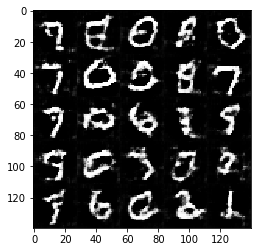

Epoch 1/2... Discriminator Loss: 1.4965... Generator Loss: 1.1126
Epoch 1/2... Discriminator Loss: 1.1989... Generator Loss: 0.8639
Epoch 1/2... Discriminator Loss: 1.3859... Generator Loss: 0.4438
Epoch 1/2... Discriminator Loss: 1.3640... Generator Loss: 0.4918
Epoch 1/2... Discriminator Loss: 1.5355... Generator Loss: 0.3660
Epoch 1/2... Discriminator Loss: 1.5708... Generator Loss: 0.3022
Epoch 1/2... Discriminator Loss: 1.4745... Generator Loss: 0.3745
Epoch 1/2... Discriminator Loss: 1.7146... Generator Loss: 0.2628
Epoch 1/2... Discriminator Loss: 1.3436... Generator Loss: 0.4526
Epoch 1/2... Discriminator Loss: 1.5490... Generator Loss: 0.3933


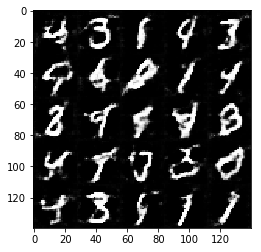

Epoch 1/2... Discriminator Loss: 1.8376... Generator Loss: 0.2440
Epoch 1/2... Discriminator Loss: 1.2746... Generator Loss: 0.4623
Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.2802
Epoch 1/2... Discriminator Loss: 1.4105... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 1.5766... Generator Loss: 0.3064
Epoch 1/2... Discriminator Loss: 1.1833... Generator Loss: 0.5298
Epoch 1/2... Discriminator Loss: 1.9265... Generator Loss: 0.1932
Epoch 1/2... Discriminator Loss: 1.5003... Generator Loss: 0.3847
Epoch 1/2... Discriminator Loss: 1.2765... Generator Loss: 0.5587
Epoch 1/2... Discriminator Loss: 1.4949... Generator Loss: 0.4019


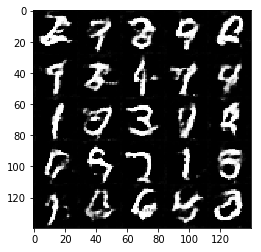

Epoch 1/2... Discriminator Loss: 1.4089... Generator Loss: 0.4045
Epoch 1/2... Discriminator Loss: 1.6625... Generator Loss: 0.2680
Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 0.3552
Epoch 1/2... Discriminator Loss: 1.4598... Generator Loss: 0.3497
Epoch 1/2... Discriminator Loss: 1.6821... Generator Loss: 0.2466
Epoch 1/2... Discriminator Loss: 1.5552... Generator Loss: 0.3105
Epoch 1/2... Discriminator Loss: 1.3101... Generator Loss: 0.4680
Epoch 1/2... Discriminator Loss: 1.1951... Generator Loss: 0.9012
Epoch 1/2... Discriminator Loss: 1.3246... Generator Loss: 0.7747
Epoch 1/2... Discriminator Loss: 1.3657... Generator Loss: 0.4208


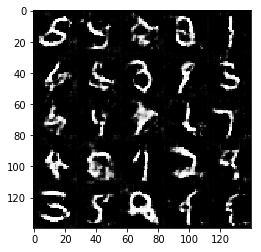

Epoch 1/2... Discriminator Loss: 1.4750... Generator Loss: 0.3850
Epoch 1/2... Discriminator Loss: 1.5677... Generator Loss: 0.3206
Epoch 1/2... Discriminator Loss: 1.6819... Generator Loss: 0.2855
Epoch 1/2... Discriminator Loss: 1.2612... Generator Loss: 0.5602
Epoch 1/2... Discriminator Loss: 1.6559... Generator Loss: 0.2898
Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.4353
Epoch 1/2... Discriminator Loss: 1.5734... Generator Loss: 0.3270
Epoch 1/2... Discriminator Loss: 1.1849... Generator Loss: 0.5170
Epoch 1/2... Discriminator Loss: 1.2786... Generator Loss: 0.4234
Epoch 1/2... Discriminator Loss: 1.4107... Generator Loss: 0.3769


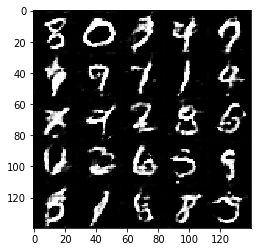

Epoch 1/2... Discriminator Loss: 1.4612... Generator Loss: 0.3986
Epoch 1/2... Discriminator Loss: 1.0626... Generator Loss: 0.8628
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 0.7881
Epoch 1/2... Discriminator Loss: 1.1491... Generator Loss: 1.1394
Epoch 1/2... Discriminator Loss: 1.0261... Generator Loss: 1.0746
Epoch 1/2... Discriminator Loss: 1.5879... Generator Loss: 0.2942
Epoch 1/2... Discriminator Loss: 1.4819... Generator Loss: 0.3634
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.3997
Epoch 1/2... Discriminator Loss: 1.1019... Generator Loss: 1.7889
Epoch 1/2... Discriminator Loss: 1.8355... Generator Loss: 2.2914


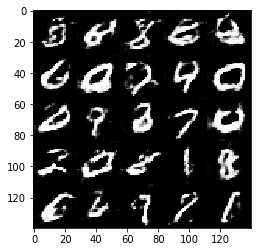

Epoch 1/2... Discriminator Loss: 1.6784... Generator Loss: 0.2573
Epoch 1/2... Discriminator Loss: 1.2952... Generator Loss: 0.4622
Epoch 1/2... Discriminator Loss: 1.7102... Generator Loss: 0.2777
Epoch 1/2... Discriminator Loss: 1.5063... Generator Loss: 0.3396
Epoch 1/2... Discriminator Loss: 1.4125... Generator Loss: 0.4024
Epoch 1/2... Discriminator Loss: 1.4826... Generator Loss: 0.3612
Epoch 1/2... Discriminator Loss: 1.0590... Generator Loss: 0.9994
Epoch 1/2... Discriminator Loss: 1.3066... Generator Loss: 1.2394
Epoch 1/2... Discriminator Loss: 0.8407... Generator Loss: 1.3868
Epoch 1/2... Discriminator Loss: 0.9448... Generator Loss: 0.7048


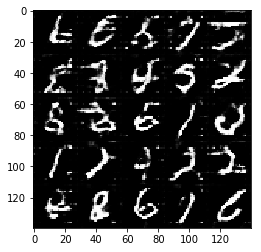

Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.4607
Epoch 1/2... Discriminator Loss: 1.0358... Generator Loss: 2.2015
Epoch 1/2... Discriminator Loss: 1.0297... Generator Loss: 0.8517
Epoch 1/2... Discriminator Loss: 1.0866... Generator Loss: 0.7855
Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 1.5620
Epoch 1/2... Discriminator Loss: 1.1157... Generator Loss: 1.3610
Epoch 1/2... Discriminator Loss: 1.2505... Generator Loss: 0.5270
Epoch 1/2... Discriminator Loss: 1.6274... Generator Loss: 0.3294
Epoch 1/2... Discriminator Loss: 1.2698... Generator Loss: 0.4964
Epoch 1/2... Discriminator Loss: 0.8348... Generator Loss: 0.7620


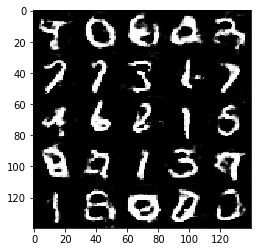

Epoch 1/2... Discriminator Loss: 1.2462... Generator Loss: 0.5653
Epoch 1/2... Discriminator Loss: 1.6323... Generator Loss: 0.2880
Epoch 1/2... Discriminator Loss: 1.7184... Generator Loss: 0.2888
Epoch 1/2... Discriminator Loss: 1.1002... Generator Loss: 0.5348
Epoch 1/2... Discriminator Loss: 1.8697... Generator Loss: 2.2005
Epoch 1/2... Discriminator Loss: 1.1598... Generator Loss: 0.9239
Epoch 1/2... Discriminator Loss: 1.0305... Generator Loss: 1.3186
Epoch 1/2... Discriminator Loss: 0.7419... Generator Loss: 1.1040
Epoch 1/2... Discriminator Loss: 0.9509... Generator Loss: 0.6924
Epoch 1/2... Discriminator Loss: 1.8198... Generator Loss: 2.1994


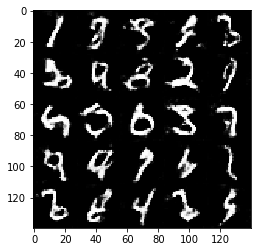

Epoch 1/2... Discriminator Loss: 0.8896... Generator Loss: 0.9956
Epoch 1/2... Discriminator Loss: 1.1823... Generator Loss: 1.1039
Epoch 1/2... Discriminator Loss: 1.0486... Generator Loss: 1.5713
Epoch 1/2... Discriminator Loss: 0.9424... Generator Loss: 1.5037
Epoch 1/2... Discriminator Loss: 1.1236... Generator Loss: 1.6843
Epoch 1/2... Discriminator Loss: 1.0766... Generator Loss: 1.4948
Epoch 1/2... Discriminator Loss: 0.7757... Generator Loss: 1.1415
Epoch 1/2... Discriminator Loss: 1.1411... Generator Loss: 1.4913
Epoch 1/2... Discriminator Loss: 0.9113... Generator Loss: 1.2712
Epoch 1/2... Discriminator Loss: 1.6528... Generator Loss: 2.1563


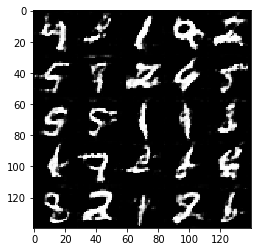

Epoch 1/2... Discriminator Loss: 0.9830... Generator Loss: 1.0139
Epoch 1/2... Discriminator Loss: 0.4727... Generator Loss: 1.6013
Epoch 1/2... Discriminator Loss: 0.6147... Generator Loss: 1.4099
Epoch 1/2... Discriminator Loss: 0.8033... Generator Loss: 1.4031
Epoch 1/2... Discriminator Loss: 1.2258... Generator Loss: 0.4748
Epoch 1/2... Discriminator Loss: 1.5956... Generator Loss: 0.2776
Epoch 1/2... Discriminator Loss: 0.6054... Generator Loss: 1.2412
Epoch 1/2... Discriminator Loss: 2.9532... Generator Loss: 0.1026
Epoch 1/2... Discriminator Loss: 0.9338... Generator Loss: 0.6448
Epoch 1/2... Discriminator Loss: 0.9251... Generator Loss: 0.8890


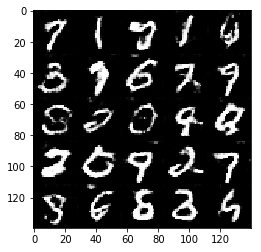

Epoch 1/2... Discriminator Loss: 0.9348... Generator Loss: 1.0749
Epoch 1/2... Discriminator Loss: 1.6759... Generator Loss: 0.2783
Epoch 1/2... Discriminator Loss: 1.9038... Generator Loss: 0.2259
Epoch 1/2... Discriminator Loss: 0.7573... Generator Loss: 0.8461
Epoch 1/2... Discriminator Loss: 0.5953... Generator Loss: 1.2324
Epoch 1/2... Discriminator Loss: 1.5167... Generator Loss: 3.1210
Epoch 1/2... Discriminator Loss: 1.6319... Generator Loss: 0.2752
Epoch 1/2... Discriminator Loss: 0.6744... Generator Loss: 1.0269
Epoch 1/2... Discriminator Loss: 0.8036... Generator Loss: 2.2236
Epoch 1/2... Discriminator Loss: 0.6953... Generator Loss: 0.9470


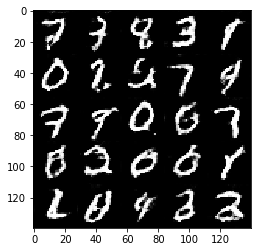

Epoch 1/2... Discriminator Loss: 0.8353... Generator Loss: 1.9186
Epoch 1/2... Discriminator Loss: 1.2764... Generator Loss: 2.3217
Epoch 1/2... Discriminator Loss: 1.2066... Generator Loss: 1.4565
Epoch 1/2... Discriminator Loss: 1.0663... Generator Loss: 1.7107
Epoch 1/2... Discriminator Loss: 1.1053... Generator Loss: 0.5747
Epoch 1/2... Discriminator Loss: 1.5692... Generator Loss: 0.3231
Epoch 1/2... Discriminator Loss: 0.6671... Generator Loss: 1.1765
Epoch 1/2... Discriminator Loss: 0.5942... Generator Loss: 1.3995
Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 1.1503
Epoch 1/2... Discriminator Loss: 0.7431... Generator Loss: 1.7222


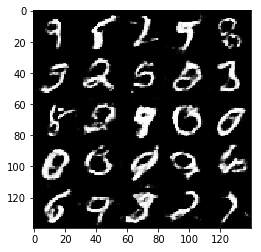

Epoch 1/2... Discriminator Loss: 0.7174... Generator Loss: 1.3281
Epoch 1/2... Discriminator Loss: 0.6550... Generator Loss: 2.1740
Epoch 1/2... Discriminator Loss: 1.1603... Generator Loss: 1.6417
Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 0.7008
Epoch 1/2... Discriminator Loss: 0.8021... Generator Loss: 0.7520
Epoch 1/2... Discriminator Loss: 2.1176... Generator Loss: 0.2004
Epoch 1/2... Discriminator Loss: 0.7166... Generator Loss: 1.1111
Epoch 2/2... Discriminator Loss: 0.8278... Generator Loss: 0.8138
Epoch 2/2... Discriminator Loss: 0.8868... Generator Loss: 1.4512
Epoch 2/2... Discriminator Loss: 0.9345... Generator Loss: 1.1263


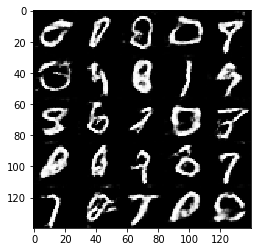

Epoch 2/2... Discriminator Loss: 0.9485... Generator Loss: 1.9811
Epoch 2/2... Discriminator Loss: 1.0595... Generator Loss: 0.5760
Epoch 2/2... Discriminator Loss: 0.4919... Generator Loss: 1.5674
Epoch 2/2... Discriminator Loss: 1.1016... Generator Loss: 1.0623
Epoch 2/2... Discriminator Loss: 1.0258... Generator Loss: 0.7734
Epoch 2/2... Discriminator Loss: 0.8650... Generator Loss: 0.7175
Epoch 2/2... Discriminator Loss: 0.8552... Generator Loss: 1.0103
Epoch 2/2... Discriminator Loss: 0.7965... Generator Loss: 1.5382
Epoch 2/2... Discriminator Loss: 0.8537... Generator Loss: 1.7403
Epoch 2/2... Discriminator Loss: 1.4861... Generator Loss: 2.5670


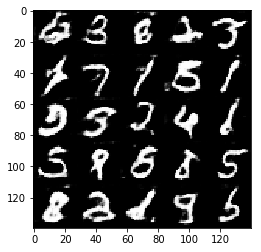

Epoch 2/2... Discriminator Loss: 0.8041... Generator Loss: 1.6259
Epoch 2/2... Discriminator Loss: 1.1248... Generator Loss: 0.7057
Epoch 2/2... Discriminator Loss: 1.5137... Generator Loss: 0.4345
Epoch 2/2... Discriminator Loss: 0.3591... Generator Loss: 1.7745
Epoch 2/2... Discriminator Loss: 0.4871... Generator Loss: 1.3014
Epoch 2/2... Discriminator Loss: 0.3758... Generator Loss: 1.6844
Epoch 2/2... Discriminator Loss: 2.5094... Generator Loss: 4.9563
Epoch 2/2... Discriminator Loss: 1.2848... Generator Loss: 0.4185
Epoch 2/2... Discriminator Loss: 1.2643... Generator Loss: 0.5843
Epoch 2/2... Discriminator Loss: 0.7439... Generator Loss: 0.8025


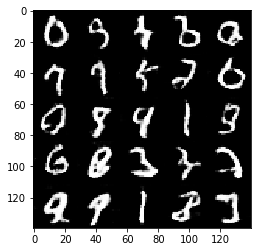

Epoch 2/2... Discriminator Loss: 0.6539... Generator Loss: 1.1197
Epoch 2/2... Discriminator Loss: 1.3339... Generator Loss: 2.5575
Epoch 2/2... Discriminator Loss: 0.6277... Generator Loss: 1.1253
Epoch 2/2... Discriminator Loss: 2.0297... Generator Loss: 0.2211
Epoch 2/2... Discriminator Loss: 0.8784... Generator Loss: 0.7466
Epoch 2/2... Discriminator Loss: 1.2928... Generator Loss: 0.4423
Epoch 2/2... Discriminator Loss: 2.1908... Generator Loss: 0.1864
Epoch 2/2... Discriminator Loss: 1.6020... Generator Loss: 0.2950
Epoch 2/2... Discriminator Loss: 0.7237... Generator Loss: 0.8782
Epoch 2/2... Discriminator Loss: 0.4556... Generator Loss: 2.5626


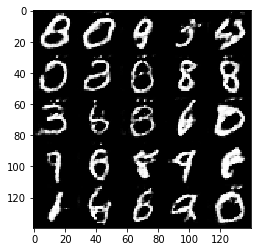

Epoch 2/2... Discriminator Loss: 0.9631... Generator Loss: 1.1690
Epoch 2/2... Discriminator Loss: 0.9929... Generator Loss: 2.1133
Epoch 2/2... Discriminator Loss: 1.3507... Generator Loss: 0.4780
Epoch 2/2... Discriminator Loss: 1.3321... Generator Loss: 0.5663
Epoch 2/2... Discriminator Loss: 1.2952... Generator Loss: 0.4123
Epoch 2/2... Discriminator Loss: 0.4803... Generator Loss: 1.5904
Epoch 2/2... Discriminator Loss: 1.7352... Generator Loss: 0.3256
Epoch 2/2... Discriminator Loss: 0.6844... Generator Loss: 1.1743
Epoch 2/2... Discriminator Loss: 1.0863... Generator Loss: 0.6366
Epoch 2/2... Discriminator Loss: 0.4820... Generator Loss: 1.5797


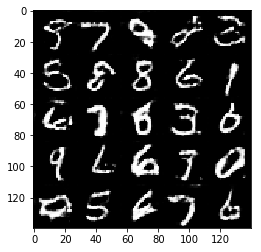

Epoch 2/2... Discriminator Loss: 0.8055... Generator Loss: 2.1208
Epoch 2/2... Discriminator Loss: 1.2915... Generator Loss: 2.0841
Epoch 2/2... Discriminator Loss: 1.6350... Generator Loss: 0.3299
Epoch 2/2... Discriminator Loss: 1.1072... Generator Loss: 0.6309
Epoch 2/2... Discriminator Loss: 0.4646... Generator Loss: 1.4618
Epoch 2/2... Discriminator Loss: 0.4944... Generator Loss: 1.1998
Epoch 2/2... Discriminator Loss: 0.8454... Generator Loss: 2.5464
Epoch 2/2... Discriminator Loss: 2.2747... Generator Loss: 0.1902
Epoch 2/2... Discriminator Loss: 0.7793... Generator Loss: 0.9507
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 2.6551


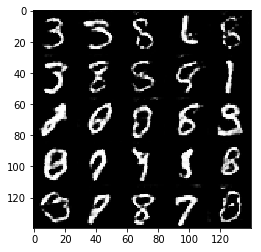

Epoch 2/2... Discriminator Loss: 1.5132... Generator Loss: 0.4572
Epoch 2/2... Discriminator Loss: 0.6428... Generator Loss: 1.5203
Epoch 2/2... Discriminator Loss: 0.4473... Generator Loss: 1.5982
Epoch 2/2... Discriminator Loss: 1.7801... Generator Loss: 0.2879
Epoch 2/2... Discriminator Loss: 1.2154... Generator Loss: 0.4517
Epoch 2/2... Discriminator Loss: 3.0073... Generator Loss: 0.0750
Epoch 2/2... Discriminator Loss: 1.2550... Generator Loss: 0.4866
Epoch 2/2... Discriminator Loss: 0.8140... Generator Loss: 1.6701
Epoch 2/2... Discriminator Loss: 0.8656... Generator Loss: 0.8217
Epoch 2/2... Discriminator Loss: 0.9196... Generator Loss: 2.1735


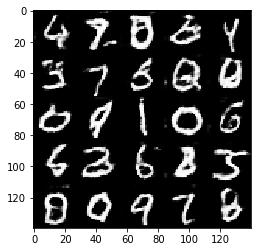

Epoch 2/2... Discriminator Loss: 1.5150... Generator Loss: 0.9206
Epoch 2/2... Discriminator Loss: 0.4836... Generator Loss: 1.6559
Epoch 2/2... Discriminator Loss: 0.4753... Generator Loss: 1.5191
Epoch 2/2... Discriminator Loss: 1.2202... Generator Loss: 0.5209
Epoch 2/2... Discriminator Loss: 0.9820... Generator Loss: 0.6897
Epoch 2/2... Discriminator Loss: 0.6190... Generator Loss: 1.2778
Epoch 2/2... Discriminator Loss: 0.4105... Generator Loss: 1.5860
Epoch 2/2... Discriminator Loss: 0.9088... Generator Loss: 0.8148
Epoch 2/2... Discriminator Loss: 0.8663... Generator Loss: 1.4583
Epoch 2/2... Discriminator Loss: 1.8131... Generator Loss: 0.2561


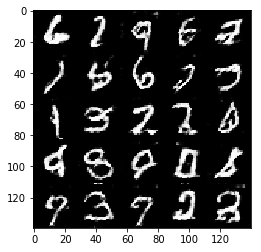

Epoch 2/2... Discriminator Loss: 1.4616... Generator Loss: 0.4031
Epoch 2/2... Discriminator Loss: 1.3356... Generator Loss: 0.4893
Epoch 2/2... Discriminator Loss: 0.9205... Generator Loss: 0.7388
Epoch 2/2... Discriminator Loss: 2.1020... Generator Loss: 0.1726
Epoch 2/2... Discriminator Loss: 1.0565... Generator Loss: 0.6430
Epoch 2/2... Discriminator Loss: 0.6493... Generator Loss: 1.4045
Epoch 2/2... Discriminator Loss: 0.8485... Generator Loss: 0.8351
Epoch 2/2... Discriminator Loss: 0.4868... Generator Loss: 1.5049
Epoch 2/2... Discriminator Loss: 0.7496... Generator Loss: 0.8456
Epoch 2/2... Discriminator Loss: 1.4181... Generator Loss: 2.8958


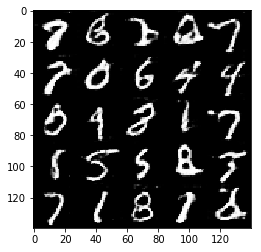

Epoch 2/2... Discriminator Loss: 0.6631... Generator Loss: 1.0465
Epoch 2/2... Discriminator Loss: 0.2548... Generator Loss: 2.3844
Epoch 2/2... Discriminator Loss: 1.0968... Generator Loss: 0.6587
Epoch 2/2... Discriminator Loss: 1.1503... Generator Loss: 0.5490
Epoch 2/2... Discriminator Loss: 0.8328... Generator Loss: 0.9187
Epoch 2/2... Discriminator Loss: 0.6808... Generator Loss: 1.1751
Epoch 2/2... Discriminator Loss: 0.6355... Generator Loss: 1.0577
Epoch 2/2... Discriminator Loss: 1.0114... Generator Loss: 0.6279
Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 1.2248
Epoch 2/2... Discriminator Loss: 1.0388... Generator Loss: 0.7049


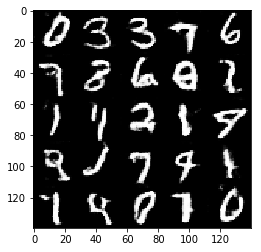

Epoch 2/2... Discriminator Loss: 0.9255... Generator Loss: 0.7941
Epoch 2/2... Discriminator Loss: 1.7103... Generator Loss: 3.3495
Epoch 2/2... Discriminator Loss: 0.4036... Generator Loss: 1.7453
Epoch 2/2... Discriminator Loss: 0.7315... Generator Loss: 2.5072
Epoch 2/2... Discriminator Loss: 1.2087... Generator Loss: 0.6088
Epoch 2/2... Discriminator Loss: 2.0426... Generator Loss: 0.2824
Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 0.8098
Epoch 2/2... Discriminator Loss: 0.5497... Generator Loss: 1.2094
Epoch 2/2... Discriminator Loss: 0.3211... Generator Loss: 2.0861
Epoch 2/2... Discriminator Loss: 0.7037... Generator Loss: 1.7570


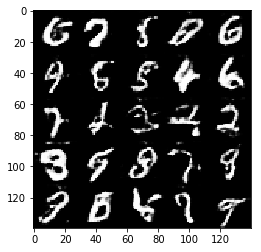

Epoch 2/2... Discriminator Loss: 0.2738... Generator Loss: 2.0893
Epoch 2/2... Discriminator Loss: 0.2963... Generator Loss: 2.3130
Epoch 2/2... Discriminator Loss: 0.6095... Generator Loss: 1.0840
Epoch 2/2... Discriminator Loss: 0.4786... Generator Loss: 1.2985
Epoch 2/2... Discriminator Loss: 3.7536... Generator Loss: 0.1145
Epoch 2/2... Discriminator Loss: 0.9706... Generator Loss: 0.7711
Epoch 2/2... Discriminator Loss: 0.7723... Generator Loss: 0.8133
Epoch 2/2... Discriminator Loss: 0.3583... Generator Loss: 2.0375
Epoch 2/2... Discriminator Loss: 0.3365... Generator Loss: 2.3280
Epoch 2/2... Discriminator Loss: 0.4900... Generator Loss: 1.3498


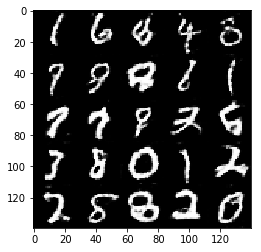

Epoch 2/2... Discriminator Loss: 0.8001... Generator Loss: 2.4112
Epoch 2/2... Discriminator Loss: 0.6948... Generator Loss: 0.9382
Epoch 2/2... Discriminator Loss: 0.2990... Generator Loss: 2.0484
Epoch 2/2... Discriminator Loss: 0.1217... Generator Loss: 3.0035
Epoch 2/2... Discriminator Loss: 0.6950... Generator Loss: 3.4009
Epoch 2/2... Discriminator Loss: 0.4398... Generator Loss: 2.2393
Epoch 2/2... Discriminator Loss: 2.6021... Generator Loss: 0.1302
Epoch 2/2... Discriminator Loss: 1.1521... Generator Loss: 0.6487
Epoch 2/2... Discriminator Loss: 1.5326... Generator Loss: 0.3811
Epoch 2/2... Discriminator Loss: 0.4880... Generator Loss: 1.6149


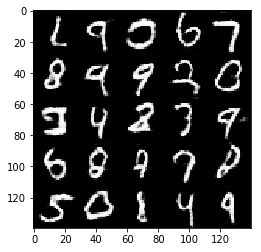

Epoch 2/2... Discriminator Loss: 0.9064... Generator Loss: 2.6400
Epoch 2/2... Discriminator Loss: 1.0976... Generator Loss: 0.6968
Epoch 2/2... Discriminator Loss: 2.2703... Generator Loss: 0.2135
Epoch 2/2... Discriminator Loss: 1.6736... Generator Loss: 0.4096
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 0.8357
Epoch 2/2... Discriminator Loss: 0.6738... Generator Loss: 1.2192
Epoch 2/2... Discriminator Loss: 1.8509... Generator Loss: 0.3147
Epoch 2/2... Discriminator Loss: 0.9045... Generator Loss: 3.3739
Epoch 2/2... Discriminator Loss: 0.6919... Generator Loss: 1.2512
Epoch 2/2... Discriminator Loss: 0.6795... Generator Loss: 1.0204


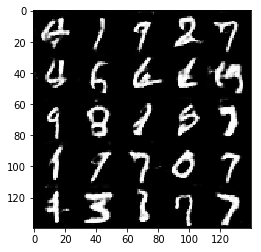

Epoch 2/2... Discriminator Loss: 0.8338... Generator Loss: 2.1976
Epoch 2/2... Discriminator Loss: 0.5531... Generator Loss: 1.1733
Epoch 2/2... Discriminator Loss: 0.4227... Generator Loss: 1.6953
Epoch 2/2... Discriminator Loss: 0.5336... Generator Loss: 2.0493
Epoch 2/2... Discriminator Loss: 0.3702... Generator Loss: 2.0900
Epoch 2/2... Discriminator Loss: 0.5950... Generator Loss: 1.1194
Epoch 2/2... Discriminator Loss: 0.4105... Generator Loss: 1.4132
Epoch 2/2... Discriminator Loss: 1.5135... Generator Loss: 0.3549
Epoch 2/2... Discriminator Loss: 0.8989... Generator Loss: 0.9796
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 0.7666


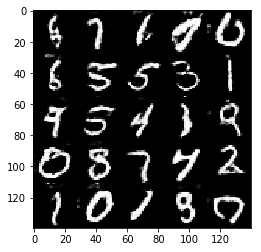

Epoch 2/2... Discriminator Loss: 0.8931... Generator Loss: 0.7415
Epoch 2/2... Discriminator Loss: 0.4943... Generator Loss: 1.2704
Epoch 2/2... Discriminator Loss: 1.4666... Generator Loss: 6.0494
Epoch 2/2... Discriminator Loss: 0.4142... Generator Loss: 3.3483
Epoch 2/2... Discriminator Loss: 0.6260... Generator Loss: 2.3324
Epoch 2/2... Discriminator Loss: 0.4463... Generator Loss: 1.5487
Epoch 2/2... Discriminator Loss: 2.4302... Generator Loss: 4.0138
Epoch 2/2... Discriminator Loss: 1.1128... Generator Loss: 0.7662
Epoch 2/2... Discriminator Loss: 1.7835... Generator Loss: 0.3515
Epoch 2/2... Discriminator Loss: 1.7562... Generator Loss: 0.3007


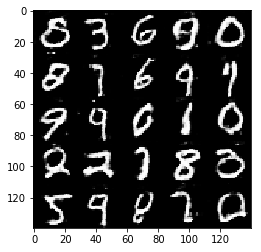

Epoch 2/2... Discriminator Loss: 1.3464... Generator Loss: 4.0389
Epoch 2/2... Discriminator Loss: 0.6178... Generator Loss: 1.3916
Epoch 2/2... Discriminator Loss: 1.8140... Generator Loss: 0.2870
Epoch 2/2... Discriminator Loss: 0.7089... Generator Loss: 1.0663
Epoch 2/2... Discriminator Loss: 1.2179... Generator Loss: 3.0999
Epoch 2/2... Discriminator Loss: 0.8605... Generator Loss: 2.0846
Epoch 2/2... Discriminator Loss: 0.7873... Generator Loss: 0.7939
Epoch 2/2... Discriminator Loss: 0.4507... Generator Loss: 1.4240
Epoch 2/2... Discriminator Loss: 0.5003... Generator Loss: 1.9085
Epoch 2/2... Discriminator Loss: 0.8978... Generator Loss: 0.7539


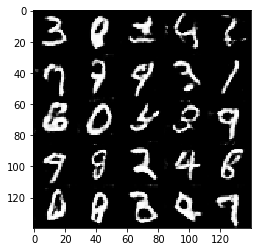

Epoch 2/2... Discriminator Loss: 1.5430... Generator Loss: 0.4671
Epoch 2/2... Discriminator Loss: 1.1501... Generator Loss: 0.6316
Epoch 2/2... Discriminator Loss: 0.4978... Generator Loss: 1.2543
Epoch 2/2... Discriminator Loss: 0.5890... Generator Loss: 1.0908
Epoch 2/2... Discriminator Loss: 0.7125... Generator Loss: 0.9637
Epoch 2/2... Discriminator Loss: 1.6931... Generator Loss: 0.4019
Epoch 2/2... Discriminator Loss: 1.1066... Generator Loss: 0.6526
Epoch 2/2... Discriminator Loss: 0.7241... Generator Loss: 1.0080
Epoch 2/2... Discriminator Loss: 2.3807... Generator Loss: 4.0868
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 0.5672


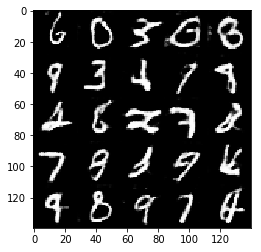

Epoch 2/2... Discriminator Loss: 0.2149... Generator Loss: 2.2550
Epoch 2/2... Discriminator Loss: 0.6690... Generator Loss: 2.0891
Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 0.9954
Epoch 2/2... Discriminator Loss: 3.0843... Generator Loss: 0.0689
Epoch 2/2... Discriminator Loss: 1.1902... Generator Loss: 0.5774
Epoch 2/2... Discriminator Loss: 0.8145... Generator Loss: 0.9720
Epoch 2/2... Discriminator Loss: 0.4660... Generator Loss: 1.7676
Epoch 2/2... Discriminator Loss: 0.5213... Generator Loss: 1.4390
Epoch 2/2... Discriminator Loss: 2.5602... Generator Loss: 0.1821
Epoch 2/2... Discriminator Loss: 3.5908... Generator Loss: 5.1895


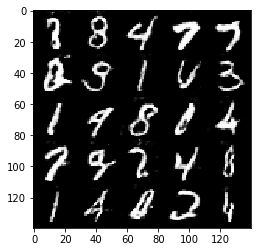

Epoch 2/2... Discriminator Loss: 0.3808... Generator Loss: 2.2238
Epoch 2/2... Discriminator Loss: 0.7796... Generator Loss: 1.1390
Epoch 2/2... Discriminator Loss: 1.1325... Generator Loss: 0.6302
Epoch 2/2... Discriminator Loss: 0.7846... Generator Loss: 2.0055
Epoch 2/2... Discriminator Loss: 0.6421... Generator Loss: 1.1188


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 5.3481... Generator Loss: 24.4157
Epoch 1/1... Discriminator Loss: 4.0327... Generator Loss: 21.7105
Epoch 1/1... Discriminator Loss: 0.6729... Generator Loss: 1.9373
Epoch 1/1... Discriminator Loss: 3.1133... Generator Loss: 8.4806
Epoch 1/1... Discriminator Loss: 1.6687... Generator Loss: 0.2956
Epoch 1/1... Discriminator Loss: 0.5630... Generator Loss: 1.6559
Epoch 1/1... Discriminator Loss: 2.6232... Generator Loss: 4.5474
Epoch 1/1... Discriminator Loss: 1.6749... Generator Loss: 1.7564
Epoch 1/1... Discriminator Loss: 0.6591... Generator Loss: 1.6651
Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 2.8858


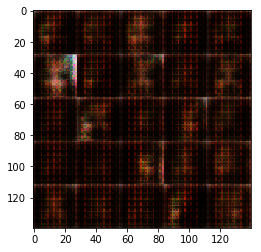

Epoch 1/1... Discriminator Loss: 1.3336... Generator Loss: 3.4100
Epoch 1/1... Discriminator Loss: 0.5345... Generator Loss: 3.5599
Epoch 1/1... Discriminator Loss: 0.3450... Generator Loss: 1.8411
Epoch 1/1... Discriminator Loss: 1.8375... Generator Loss: 0.2266
Epoch 1/1... Discriminator Loss: 0.3826... Generator Loss: 2.4451
Epoch 1/1... Discriminator Loss: 0.6676... Generator Loss: 0.8657
Epoch 1/1... Discriminator Loss: 2.0940... Generator Loss: 0.1951
Epoch 1/1... Discriminator Loss: 1.7865... Generator Loss: 2.0473
Epoch 1/1... Discriminator Loss: 0.3876... Generator Loss: 1.6673
Epoch 1/1... Discriminator Loss: 0.2224... Generator Loss: 2.3635


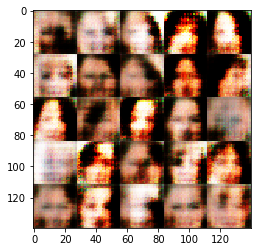

Epoch 1/1... Discriminator Loss: 0.5905... Generator Loss: 4.3908
Epoch 1/1... Discriminator Loss: 1.7100... Generator Loss: 0.3983
Epoch 1/1... Discriminator Loss: 0.3686... Generator Loss: 2.7255
Epoch 1/1... Discriminator Loss: 0.2347... Generator Loss: 3.3440
Epoch 1/1... Discriminator Loss: 0.8689... Generator Loss: 4.4538
Epoch 1/1... Discriminator Loss: 3.5177... Generator Loss: 3.7581
Epoch 1/1... Discriminator Loss: 0.8457... Generator Loss: 1.9886
Epoch 1/1... Discriminator Loss: 0.8836... Generator Loss: 2.5427
Epoch 1/1... Discriminator Loss: 1.8692... Generator Loss: 0.2173
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 1.5748


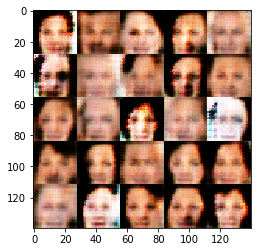

Epoch 1/1... Discriminator Loss: 1.4881... Generator Loss: 3.6590
Epoch 1/1... Discriminator Loss: 0.2305... Generator Loss: 3.8599
Epoch 1/1... Discriminator Loss: 1.2148... Generator Loss: 4.2122
Epoch 1/1... Discriminator Loss: 1.8490... Generator Loss: 2.9997
Epoch 1/1... Discriminator Loss: 0.6430... Generator Loss: 1.3891
Epoch 1/1... Discriminator Loss: 1.1759... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.0086... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.3023... Generator Loss: 0.3898
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 0.7300
Epoch 1/1... Discriminator Loss: 1.6528... Generator Loss: 0.2876


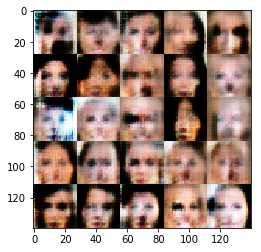

Epoch 1/1... Discriminator Loss: 0.5237... Generator Loss: 1.7570
Epoch 1/1... Discriminator Loss: 1.0242... Generator Loss: 3.6046
Epoch 1/1... Discriminator Loss: 0.7094... Generator Loss: 0.8388
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 0.5647
Epoch 1/1... Discriminator Loss: 0.9498... Generator Loss: 2.1674
Epoch 1/1... Discriminator Loss: 0.4194... Generator Loss: 1.3852
Epoch 1/1... Discriminator Loss: 1.3278... Generator Loss: 0.8704
Epoch 1/1... Discriminator Loss: 0.6151... Generator Loss: 1.2045
Epoch 1/1... Discriminator Loss: 2.0711... Generator Loss: 0.1868
Epoch 1/1... Discriminator Loss: 1.9385... Generator Loss: 3.6073


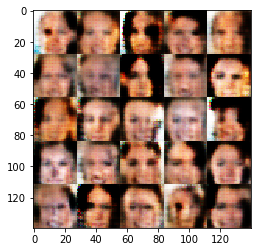

Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 2.6951
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 0.2810
Epoch 1/1... Discriminator Loss: 2.2081... Generator Loss: 3.2152
Epoch 1/1... Discriminator Loss: 1.0084... Generator Loss: 3.0215
Epoch 1/1... Discriminator Loss: 0.5627... Generator Loss: 2.6419
Epoch 1/1... Discriminator Loss: 1.7124... Generator Loss: 2.8234
Epoch 1/1... Discriminator Loss: 0.5151... Generator Loss: 1.2480
Epoch 1/1... Discriminator Loss: 0.4971... Generator Loss: 1.2679
Epoch 1/1... Discriminator Loss: 0.2201... Generator Loss: 5.3619
Epoch 1/1... Discriminator Loss: 0.0564... Generator Loss: 3.3399


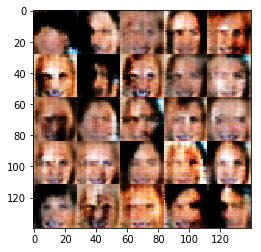

Epoch 1/1... Discriminator Loss: 1.6017... Generator Loss: 0.3251
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.4625
Epoch 1/1... Discriminator Loss: 0.1482... Generator Loss: 2.4412
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 0.6049... Generator Loss: 1.4582
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 1.0649
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 2.4862
Epoch 1/1... Discriminator Loss: 1.6941... Generator Loss: 0.2663
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.4110
Epoch 1/1... Discriminator Loss: 1.4970... Generator Loss: 2.6816


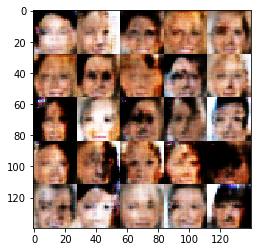

Epoch 1/1... Discriminator Loss: 0.6414... Generator Loss: 3.1540
Epoch 1/1... Discriminator Loss: 0.0969... Generator Loss: 3.4353
Epoch 1/1... Discriminator Loss: 0.1070... Generator Loss: 5.0938
Epoch 1/1... Discriminator Loss: 0.0212... Generator Loss: 6.5805
Epoch 1/1... Discriminator Loss: 2.7179... Generator Loss: 3.2374
Epoch 1/1... Discriminator Loss: 1.7683... Generator Loss: 0.2663
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 0.5350
Epoch 1/1... Discriminator Loss: 0.4805... Generator Loss: 1.3422
Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 2.4664


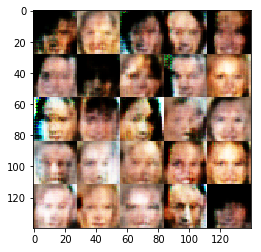

Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 0.5755
Epoch 1/1... Discriminator Loss: 0.4683... Generator Loss: 1.1648
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 0.6754
Epoch 1/1... Discriminator Loss: 1.7937... Generator Loss: 2.7890
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 1.5143
Epoch 1/1... Discriminator Loss: 0.2484... Generator Loss: 2.3497
Epoch 1/1... Discriminator Loss: 0.5637... Generator Loss: 1.2041
Epoch 1/1... Discriminator Loss: 1.5263... Generator Loss: 0.2901
Epoch 1/1... Discriminator Loss: 2.1426... Generator Loss: 3.1471
Epoch 1/1... Discriminator Loss: 0.1682... Generator Loss: 2.4468


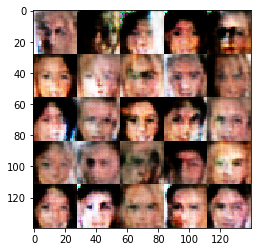

Epoch 1/1... Discriminator Loss: 0.0267... Generator Loss: 5.2389
Epoch 1/1... Discriminator Loss: 0.1370... Generator Loss: 2.7063
Epoch 1/1... Discriminator Loss: 0.9542... Generator Loss: 3.8763
Epoch 1/1... Discriminator Loss: 0.9497... Generator Loss: 1.4442
Epoch 1/1... Discriminator Loss: 0.5653... Generator Loss: 2.5395
Epoch 1/1... Discriminator Loss: 0.1983... Generator Loss: 2.0175
Epoch 1/1... Discriminator Loss: 0.0267... Generator Loss: 4.7419
Epoch 1/1... Discriminator Loss: 0.1104... Generator Loss: 5.6090
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.5943
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.5206


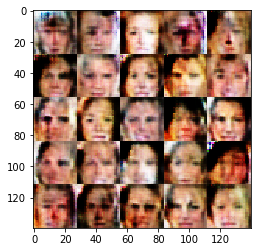

Epoch 1/1... Discriminator Loss: 1.8274... Generator Loss: 0.2289
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 0.5592
Epoch 1/1... Discriminator Loss: 0.7336... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 2.7046
Epoch 1/1... Discriminator Loss: 0.6698... Generator Loss: 2.4367
Epoch 1/1... Discriminator Loss: 2.8439... Generator Loss: 4.3748
Epoch 1/1... Discriminator Loss: 0.0802... Generator Loss: 3.1038
Epoch 1/1... Discriminator Loss: 0.0482... Generator Loss: 4.0254
Epoch 1/1... Discriminator Loss: 0.1318... Generator Loss: 3.6244
Epoch 1/1... Discriminator Loss: 0.1948... Generator Loss: 1.8900


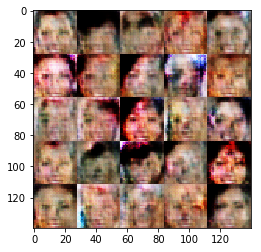

Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 4.3050
Epoch 1/1... Discriminator Loss: 0.1548... Generator Loss: 3.1003
Epoch 1/1... Discriminator Loss: 0.6890... Generator Loss: 1.3857
Epoch 1/1... Discriminator Loss: 1.8401... Generator Loss: 0.2082
Epoch 1/1... Discriminator Loss: 0.2336... Generator Loss: 2.0703
Epoch 1/1... Discriminator Loss: 0.6695... Generator Loss: 4.9069
Epoch 1/1... Discriminator Loss: 0.3226... Generator Loss: 1.5852
Epoch 1/1... Discriminator Loss: 0.2494... Generator Loss: 2.0294
Epoch 1/1... Discriminator Loss: 2.8600... Generator Loss: 0.4001
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.8261


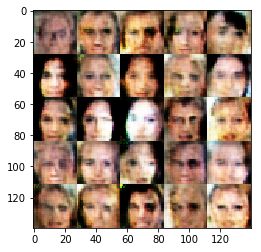

Epoch 1/1... Discriminator Loss: 1.7391... Generator Loss: 0.3341
Epoch 1/1... Discriminator Loss: 1.0274... Generator Loss: 0.6802
Epoch 1/1... Discriminator Loss: 1.0727... Generator Loss: 0.9395
Epoch 1/1... Discriminator Loss: 0.9854... Generator Loss: 2.1542
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.4326
Epoch 1/1... Discriminator Loss: 2.0771... Generator Loss: 3.7345
Epoch 1/1... Discriminator Loss: 0.3572... Generator Loss: 3.2323
Epoch 1/1... Discriminator Loss: 1.9067... Generator Loss: 2.3813
Epoch 1/1... Discriminator Loss: 1.1078... Generator Loss: 0.6247
Epoch 1/1... Discriminator Loss: 1.0842... Generator Loss: 0.5725


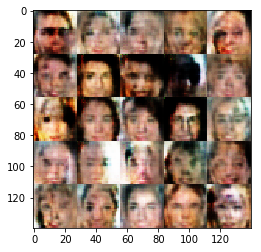

Epoch 1/1... Discriminator Loss: 0.1680... Generator Loss: 2.4660
Epoch 1/1... Discriminator Loss: 3.5268... Generator Loss: 0.0405
Epoch 1/1... Discriminator Loss: 0.4024... Generator Loss: 2.0897
Epoch 1/1... Discriminator Loss: 0.2821... Generator Loss: 1.7500
Epoch 1/1... Discriminator Loss: 0.0657... Generator Loss: 3.2128
Epoch 1/1... Discriminator Loss: 2.1399... Generator Loss: 0.1658
Epoch 1/1... Discriminator Loss: 0.9435... Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.5722
Epoch 1/1... Discriminator Loss: 0.6570... Generator Loss: 2.7404
Epoch 1/1... Discriminator Loss: 0.6257... Generator Loss: 0.9533


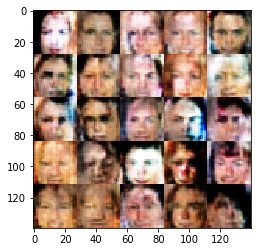

Epoch 1/1... Discriminator Loss: 0.2624... Generator Loss: 1.8431
Epoch 1/1... Discriminator Loss: 0.0966... Generator Loss: 3.1995
Epoch 1/1... Discriminator Loss: 0.1764... Generator Loss: 2.4209
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 0.4287... Generator Loss: 1.5575
Epoch 1/1... Discriminator Loss: 0.1183... Generator Loss: 4.1493
Epoch 1/1... Discriminator Loss: 1.6236... Generator Loss: 3.7856
Epoch 1/1... Discriminator Loss: 0.0375... Generator Loss: 4.8854
Epoch 1/1... Discriminator Loss: 0.0555... Generator Loss: 3.4894
Epoch 1/1... Discriminator Loss: 1.8108... Generator Loss: 2.3498


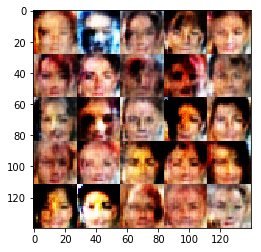

Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 1.6789
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 1.2087
Epoch 1/1... Discriminator Loss: 1.0587... Generator Loss: 0.9194
Epoch 1/1... Discriminator Loss: 1.0624... Generator Loss: 0.6244
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 0.8206
Epoch 1/1... Discriminator Loss: 0.7613... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 0.9434... Generator Loss: 1.3258
Epoch 1/1... Discriminator Loss: 0.5764... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 2.0568... Generator Loss: 3.0052
Epoch 1/1... Discriminator Loss: 0.5713... Generator Loss: 1.5135


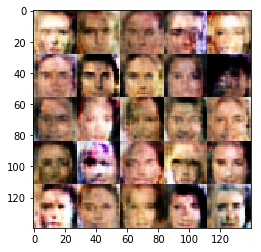

Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 0.8789
Epoch 1/1... Discriminator Loss: 1.8842... Generator Loss: 0.2070
Epoch 1/1... Discriminator Loss: 0.5576... Generator Loss: 1.1732
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 0.5374
Epoch 1/1... Discriminator Loss: 0.2579... Generator Loss: 2.1216
Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.1773... Generator Loss: 2.4888
Epoch 1/1... Discriminator Loss: 4.2184... Generator Loss: 0.0183
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.4456
Epoch 1/1... Discriminator Loss: 1.2829... Generator Loss: 3.5937


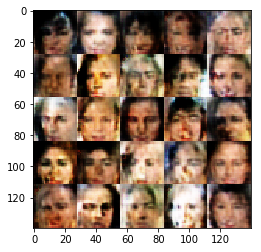

Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 0.7376... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 0.4945... Generator Loss: 1.4962
Epoch 1/1... Discriminator Loss: 0.3561... Generator Loss: 2.1064
Epoch 1/1... Discriminator Loss: 1.0834... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 0.8388... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 0.0741... Generator Loss: 3.2015
Epoch 1/1... Discriminator Loss: 0.2515... Generator Loss: 1.6848
Epoch 1/1... Discriminator Loss: 0.0902... Generator Loss: 4.6874
Epoch 1/1... Discriminator Loss: 0.0285... Generator Loss: 5.3076


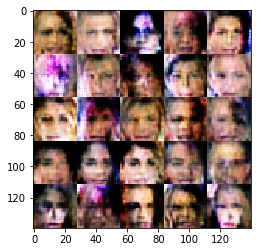

Epoch 1/1... Discriminator Loss: 0.0618... Generator Loss: 3.2212
Epoch 1/1... Discriminator Loss: 0.0361... Generator Loss: 4.3007
Epoch 1/1... Discriminator Loss: 0.0424... Generator Loss: 3.7118
Epoch 1/1... Discriminator Loss: 0.0825... Generator Loss: 3.0124
Epoch 1/1... Discriminator Loss: 0.7899... Generator Loss: 1.1814
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.4689
Epoch 1/1... Discriminator Loss: 1.0224... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.4654
Epoch 1/1... Discriminator Loss: 0.7982... Generator Loss: 0.8931
Epoch 1/1... Discriminator Loss: 0.7240... Generator Loss: 0.9581


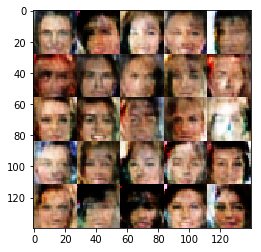

Epoch 1/1... Discriminator Loss: 1.7186... Generator Loss: 0.4239
Epoch 1/1... Discriminator Loss: 2.1990... Generator Loss: 0.1684
Epoch 1/1... Discriminator Loss: 1.6184... Generator Loss: 3.4549
Epoch 1/1... Discriminator Loss: 0.3148... Generator Loss: 1.6522
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 2.5073
Epoch 1/1... Discriminator Loss: 1.5671... Generator Loss: 0.3460
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 2.5083
Epoch 1/1... Discriminator Loss: 0.2042... Generator Loss: 2.3877
Epoch 1/1... Discriminator Loss: 1.0527... Generator Loss: 2.9667
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 0.8475


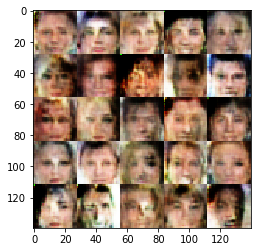

Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.5924
Epoch 1/1... Discriminator Loss: 0.1975... Generator Loss: 2.4185
Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 1.2679
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 0.5772
Epoch 1/1... Discriminator Loss: 0.6239... Generator Loss: 1.1337
Epoch 1/1... Discriminator Loss: 0.1948... Generator Loss: 3.0525
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.2111
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.4453
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.3380


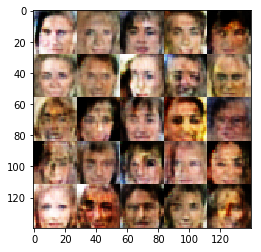

Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 1.3485
Epoch 1/1... Discriminator Loss: 0.7831... Generator Loss: 0.9007
Epoch 1/1... Discriminator Loss: 0.4013... Generator Loss: 1.4244
Epoch 1/1... Discriminator Loss: 2.0059... Generator Loss: 0.1900
Epoch 1/1... Discriminator Loss: 0.1840... Generator Loss: 2.0619
Epoch 1/1... Discriminator Loss: 0.1580... Generator Loss: 2.1988
Epoch 1/1... Discriminator Loss: 0.1408... Generator Loss: 2.4946
Epoch 1/1... Discriminator Loss: 2.3028... Generator Loss: 0.1340
Epoch 1/1... Discriminator Loss: 0.4708... Generator Loss: 1.1244
Epoch 1/1... Discriminator Loss: 0.5543... Generator Loss: 1.4921


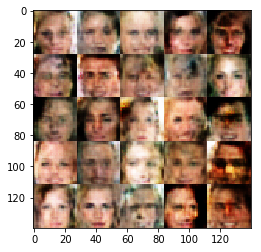

Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 2.0550
Epoch 1/1... Discriminator Loss: 0.3687... Generator Loss: 1.6936
Epoch 1/1... Discriminator Loss: 0.0630... Generator Loss: 3.4749
Epoch 1/1... Discriminator Loss: 0.2191... Generator Loss: 1.8849
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 2.4535
Epoch 1/1... Discriminator Loss: 0.1564... Generator Loss: 2.7114
Epoch 1/1... Discriminator Loss: 0.9080... Generator Loss: 1.7780
Epoch 1/1... Discriminator Loss: 0.7488... Generator Loss: 1.4228
Epoch 1/1... Discriminator Loss: 1.2052... Generator Loss: 0.4432


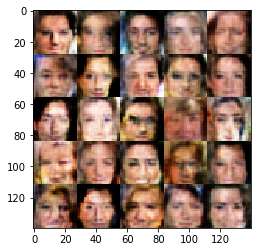

Epoch 1/1... Discriminator Loss: 0.6887... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 3.7471
Epoch 1/1... Discriminator Loss: 0.1999... Generator Loss: 1.9910
Epoch 1/1... Discriminator Loss: 0.4562... Generator Loss: 1.3933
Epoch 1/1... Discriminator Loss: 1.4253... Generator Loss: 0.4026
Epoch 1/1... Discriminator Loss: 0.1451... Generator Loss: 2.2295
Epoch 1/1... Discriminator Loss: 0.3237... Generator Loss: 4.4722
Epoch 1/1... Discriminator Loss: 0.1238... Generator Loss: 2.7465
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.7183
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.1674


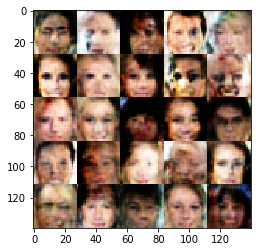

Epoch 1/1... Discriminator Loss: 0.4199... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 0.7727... Generator Loss: 0.8553
Epoch 1/1... Discriminator Loss: 0.2359... Generator Loss: 2.5172
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.3931
Epoch 1/1... Discriminator Loss: 2.6035... Generator Loss: 4.3124
Epoch 1/1... Discriminator Loss: 0.0791... Generator Loss: 3.6454
Epoch 1/1... Discriminator Loss: 0.5402... Generator Loss: 1.0411
Epoch 1/1... Discriminator Loss: 0.0824... Generator Loss: 3.5612
Epoch 1/1... Discriminator Loss: 0.0328... Generator Loss: 4.0942
Epoch 1/1... Discriminator Loss: 0.2169... Generator Loss: 1.8788


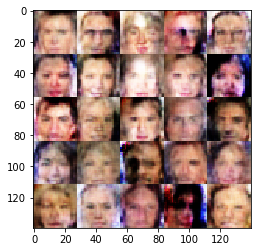

Epoch 1/1... Discriminator Loss: 0.3282... Generator Loss: 3.0292
Epoch 1/1... Discriminator Loss: 0.1559... Generator Loss: 2.4015
Epoch 1/1... Discriminator Loss: 1.0460... Generator Loss: 1.3293
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 2.7073
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 1.3128
Epoch 1/1... Discriminator Loss: 3.3437... Generator Loss: 4.3478
Epoch 1/1... Discriminator Loss: 0.6554... Generator Loss: 3.7130
Epoch 1/1... Discriminator Loss: 0.9339... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.3940
Epoch 1/1... Discriminator Loss: 0.1354... Generator Loss: 2.6190


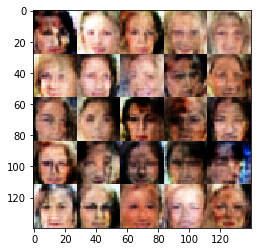

Epoch 1/1... Discriminator Loss: 0.2156... Generator Loss: 2.4010
Epoch 1/1... Discriminator Loss: 0.3849... Generator Loss: 1.3845
Epoch 1/1... Discriminator Loss: 0.2082... Generator Loss: 1.9832
Epoch 1/1... Discriminator Loss: 0.7877... Generator Loss: 1.3375
Epoch 1/1... Discriminator Loss: 0.2501... Generator Loss: 2.9790
Epoch 1/1... Discriminator Loss: 0.0395... Generator Loss: 4.8242
Epoch 1/1... Discriminator Loss: 0.0372... Generator Loss: 4.0417
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 4.4762
Epoch 1/1... Discriminator Loss: 1.5990... Generator Loss: 0.3557
Epoch 1/1... Discriminator Loss: 0.8716... Generator Loss: 2.1618


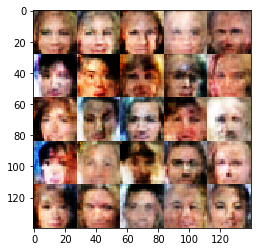

Epoch 1/1... Discriminator Loss: 0.8719... Generator Loss: 2.1829
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 2.5111
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 0.1843... Generator Loss: 2.3954
Epoch 1/1... Discriminator Loss: 0.7310... Generator Loss: 2.9082
Epoch 1/1... Discriminator Loss: 3.1277... Generator Loss: 4.3855
Epoch 1/1... Discriminator Loss: 0.3530... Generator Loss: 1.4783
Epoch 1/1... Discriminator Loss: 1.7186... Generator Loss: 0.2624
Epoch 1/1... Discriminator Loss: 0.3979... Generator Loss: 2.6186
Epoch 1/1... Discriminator Loss: 0.5556... Generator Loss: 1.1855


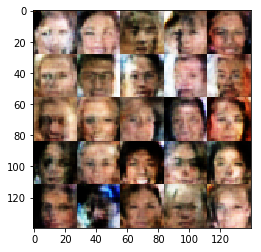

Epoch 1/1... Discriminator Loss: 1.1101... Generator Loss: 5.3802
Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 0.8547
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 1.3373
Epoch 1/1... Discriminator Loss: 0.1190... Generator Loss: 2.7268
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 0.1664... Generator Loss: 2.3770
Epoch 1/1... Discriminator Loss: 0.7128... Generator Loss: 0.7764
Epoch 1/1... Discriminator Loss: 0.0652... Generator Loss: 3.5274
Epoch 1/1... Discriminator Loss: 0.8050... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 0.2331... Generator Loss: 1.7631


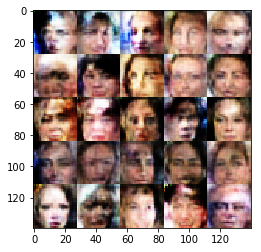

Epoch 1/1... Discriminator Loss: 0.4208... Generator Loss: 4.1743
Epoch 1/1... Discriminator Loss: 0.2719... Generator Loss: 1.6813
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 0.4861
Epoch 1/1... Discriminator Loss: 0.1016... Generator Loss: 2.8719
Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 0.8430... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 0.2722... Generator Loss: 1.6991
Epoch 1/1... Discriminator Loss: 0.7785... Generator Loss: 0.8259
Epoch 1/1... Discriminator Loss: 0.0416... Generator Loss: 4.1340
Epoch 1/1... Discriminator Loss: 3.3046... Generator Loss: 5.2843


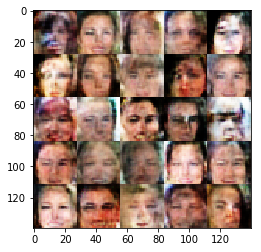

Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 0.7437... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.4213
Epoch 1/1... Discriminator Loss: 1.1528... Generator Loss: 3.0781
Epoch 1/1... Discriminator Loss: 0.1636... Generator Loss: 3.2187
Epoch 1/1... Discriminator Loss: 0.1891... Generator Loss: 2.1329
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 4.0764
Epoch 1/1... Discriminator Loss: 0.1713... Generator Loss: 2.3122
Epoch 1/1... Discriminator Loss: 0.0328... Generator Loss: 4.2103
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 2.9451


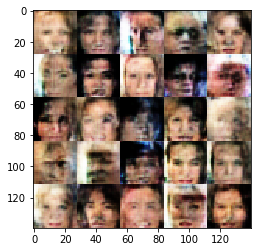

Epoch 1/1... Discriminator Loss: 0.0216... Generator Loss: 5.2712
Epoch 1/1... Discriminator Loss: 0.0201... Generator Loss: 5.6453
Epoch 1/1... Discriminator Loss: 0.0496... Generator Loss: 3.8702
Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 4.7784
Epoch 1/1... Discriminator Loss: 0.7310... Generator Loss: 1.1777
Epoch 1/1... Discriminator Loss: 0.9885... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 0.5197... Generator Loss: 1.6428
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 1.0671
Epoch 1/1... Discriminator Loss: 1.8733... Generator Loss: 0.2498


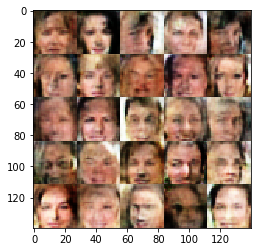

Epoch 1/1... Discriminator Loss: 0.6400... Generator Loss: 1.0742
Epoch 1/1... Discriminator Loss: 1.2357... Generator Loss: 0.5050
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 0.7995
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 1.9292
Epoch 1/1... Discriminator Loss: 0.3294... Generator Loss: 1.7865
Epoch 1/1... Discriminator Loss: 1.6590... Generator Loss: 0.3207
Epoch 1/1... Discriminator Loss: 0.1305... Generator Loss: 3.3136
Epoch 1/1... Discriminator Loss: 0.6610... Generator Loss: 3.4232
Epoch 1/1... Discriminator Loss: 0.0570... Generator Loss: 3.5879
Epoch 1/1... Discriminator Loss: 0.0558... Generator Loss: 3.6350


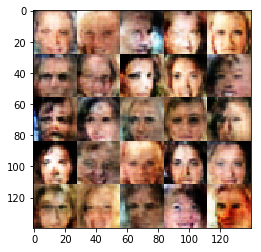

Epoch 1/1... Discriminator Loss: 0.0778... Generator Loss: 3.1861
Epoch 1/1... Discriminator Loss: 0.2843... Generator Loss: 2.0440
Epoch 1/1... Discriminator Loss: 0.5189... Generator Loss: 5.1401
Epoch 1/1... Discriminator Loss: 0.2779... Generator Loss: 1.7500
Epoch 1/1... Discriminator Loss: 0.6787... Generator Loss: 1.0754
Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 2.2547
Epoch 1/1... Discriminator Loss: 1.6255... Generator Loss: 4.0664
Epoch 1/1... Discriminator Loss: 0.0960... Generator Loss: 3.0705
Epoch 1/1... Discriminator Loss: 0.3388... Generator Loss: 2.1753
Epoch 1/1... Discriminator Loss: 0.1210... Generator Loss: 4.8444


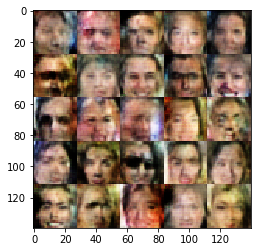

Epoch 1/1... Discriminator Loss: 0.7291... Generator Loss: 3.8582
Epoch 1/1... Discriminator Loss: 0.0754... Generator Loss: 3.2037
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 2.6485
Epoch 1/1... Discriminator Loss: 1.6322... Generator Loss: 4.2117
Epoch 1/1... Discriminator Loss: 0.9171... Generator Loss: 1.7862
Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 2.6188
Epoch 1/1... Discriminator Loss: 0.6220... Generator Loss: 2.2674
Epoch 1/1... Discriminator Loss: 0.5479... Generator Loss: 1.3603
Epoch 1/1... Discriminator Loss: 0.1091... Generator Loss: 3.2621
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 3.5858


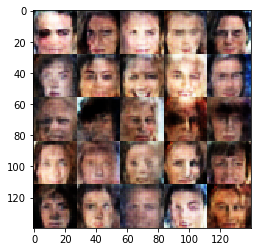

Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.4720
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 2.3836
Epoch 1/1... Discriminator Loss: 0.5561... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 0.2138... Generator Loss: 4.0883
Epoch 1/1... Discriminator Loss: 3.5064... Generator Loss: 0.0376
Epoch 1/1... Discriminator Loss: 0.2575... Generator Loss: 2.0216
Epoch 1/1... Discriminator Loss: 0.1446... Generator Loss: 3.2285
Epoch 1/1... Discriminator Loss: 0.0436... Generator Loss: 4.0992
Epoch 1/1... Discriminator Loss: 0.2458... Generator Loss: 4.0544
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 1.3722


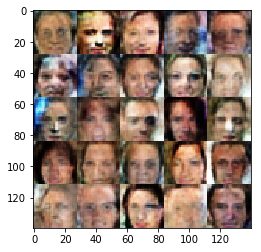

Epoch 1/1... Discriminator Loss: 0.1193... Generator Loss: 3.3482
Epoch 1/1... Discriminator Loss: 0.1629... Generator Loss: 5.5399
Epoch 1/1... Discriminator Loss: 0.0576... Generator Loss: 3.6420
Epoch 1/1... Discriminator Loss: 1.5036... Generator Loss: 0.3854
Epoch 1/1... Discriminator Loss: 0.1877... Generator Loss: 3.4617
Epoch 1/1... Discriminator Loss: 0.5234... Generator Loss: 2.1118
Epoch 1/1... Discriminator Loss: 0.1898... Generator Loss: 3.4368
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 3.0243
Epoch 1/1... Discriminator Loss: 0.1349... Generator Loss: 2.5559
Epoch 1/1... Discriminator Loss: 0.0300... Generator Loss: 4.5858


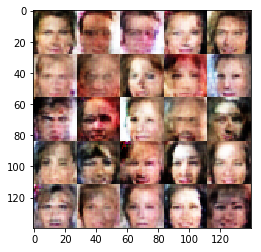

Epoch 1/1... Discriminator Loss: 0.0725... Generator Loss: 3.6272
Epoch 1/1... Discriminator Loss: 1.8626... Generator Loss: 0.2317
Epoch 1/1... Discriminator Loss: 0.6596... Generator Loss: 1.0248
Epoch 1/1... Discriminator Loss: 3.7636... Generator Loss: 0.0653
Epoch 1/1... Discriminator Loss: 1.6323... Generator Loss: 0.3320
Epoch 1/1... Discriminator Loss: 0.2785... Generator Loss: 1.6608
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.4579
Epoch 1/1... Discriminator Loss: 0.1965... Generator Loss: 2.3652
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 0.8193
Epoch 1/1... Discriminator Loss: 0.1291... Generator Loss: 2.6868


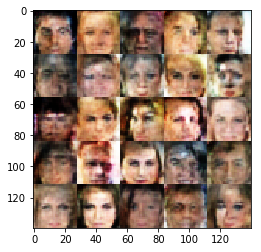

Epoch 1/1... Discriminator Loss: 0.7434... Generator Loss: 1.2149
Epoch 1/1... Discriminator Loss: 0.8592... Generator Loss: 0.8519
Epoch 1/1... Discriminator Loss: 0.8416... Generator Loss: 0.9672
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 2.5649
Epoch 1/1... Discriminator Loss: 0.1689... Generator Loss: 2.7403
Epoch 1/1... Discriminator Loss: 0.1432... Generator Loss: 2.5877
Epoch 1/1... Discriminator Loss: 0.0782... Generator Loss: 3.1690
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.5937
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.4958


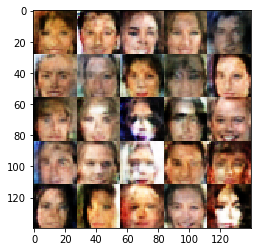

Epoch 1/1... Discriminator Loss: 0.9028... Generator Loss: 3.8982
Epoch 1/1... Discriminator Loss: 0.0566... Generator Loss: 3.8385
Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 1.0780
Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 1.2990
Epoch 1/1... Discriminator Loss: 0.3228... Generator Loss: 2.3347
Epoch 1/1... Discriminator Loss: 0.1361... Generator Loss: 2.3623
Epoch 1/1... Discriminator Loss: 0.0938... Generator Loss: 2.8569
Epoch 1/1... Discriminator Loss: 0.6340... Generator Loss: 1.1356
Epoch 1/1... Discriminator Loss: 0.5812... Generator Loss: 1.4461
Epoch 1/1... Discriminator Loss: 0.7577... Generator Loss: 2.2950


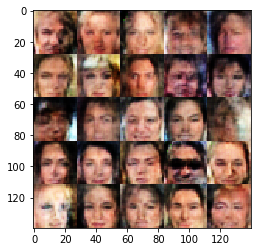

Epoch 1/1... Discriminator Loss: 0.7760... Generator Loss: 2.2464
Epoch 1/1... Discriminator Loss: 0.8265... Generator Loss: 2.1509
Epoch 1/1... Discriminator Loss: 0.2687... Generator Loss: 1.8727
Epoch 1/1... Discriminator Loss: 0.9018... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 0.8894... Generator Loss: 2.1971
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 0.4976
Epoch 1/1... Discriminator Loss: 0.4632... Generator Loss: 1.3257
Epoch 1/1... Discriminator Loss: 0.4227... Generator Loss: 1.9426
Epoch 1/1... Discriminator Loss: 0.0714... Generator Loss: 3.2086
Epoch 1/1... Discriminator Loss: 0.4450... Generator Loss: 2.5927


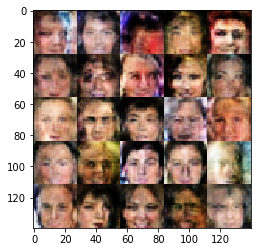

Epoch 1/1... Discriminator Loss: 0.0748... Generator Loss: 3.7060
Epoch 1/1... Discriminator Loss: 0.0898... Generator Loss: 3.4180
Epoch 1/1... Discriminator Loss: 0.7975... Generator Loss: 2.6203
Epoch 1/1... Discriminator Loss: 0.6775... Generator Loss: 1.3940
Epoch 1/1... Discriminator Loss: 0.6043... Generator Loss: 1.0186
Epoch 1/1... Discriminator Loss: 0.0685... Generator Loss: 3.5279
Epoch 1/1... Discriminator Loss: 0.0875... Generator Loss: 3.1638
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 0.4984
Epoch 1/1... Discriminator Loss: 0.9662... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 0.2074... Generator Loss: 3.9614


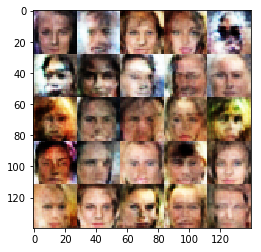

Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 3.9878
Epoch 1/1... Discriminator Loss: 0.8908... Generator Loss: 0.6439
Epoch 1/1... Discriminator Loss: 0.6349... Generator Loss: 1.5853
Epoch 1/1... Discriminator Loss: 1.6737... Generator Loss: 3.7907
Epoch 1/1... Discriminator Loss: 0.1397... Generator Loss: 2.6332
Epoch 1/1... Discriminator Loss: 0.4739... Generator Loss: 2.6914
Epoch 1/1... Discriminator Loss: 0.3191... Generator Loss: 2.0070
Epoch 1/1... Discriminator Loss: 0.4275... Generator Loss: 4.9184
Epoch 1/1... Discriminator Loss: 1.0504... Generator Loss: 2.3866
Epoch 1/1... Discriminator Loss: 0.5602... Generator Loss: 2.7712


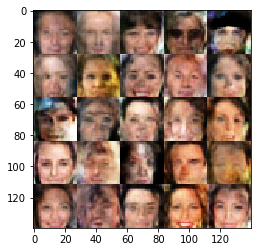

Epoch 1/1... Discriminator Loss: 0.1066... Generator Loss: 2.7743
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 4.3445
Epoch 1/1... Discriminator Loss: 0.0829... Generator Loss: 4.5295
Epoch 1/1... Discriminator Loss: 0.0342... Generator Loss: 4.5259
Epoch 1/1... Discriminator Loss: 0.3620... Generator Loss: 4.3959
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 6.2353
Epoch 1/1... Discriminator Loss: 0.0385... Generator Loss: 5.5813
Epoch 1/1... Discriminator Loss: 0.0183... Generator Loss: 5.6583
Epoch 1/1... Discriminator Loss: 0.2979... Generator Loss: 1.5581
Epoch 1/1... Discriminator Loss: 2.3148... Generator Loss: 3.0336


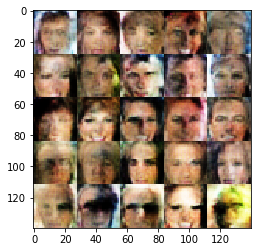

Epoch 1/1... Discriminator Loss: 0.6259... Generator Loss: 1.2926
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.4618
Epoch 1/1... Discriminator Loss: 0.7613... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 1.7906
Epoch 1/1... Discriminator Loss: 0.6099... Generator Loss: 2.2396
Epoch 1/1... Discriminator Loss: 0.6234... Generator Loss: 1.7055
Epoch 1/1... Discriminator Loss: 0.5382... Generator Loss: 1.7708
Epoch 1/1... Discriminator Loss: 0.6415... Generator Loss: 2.6051
Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 2.5667
Epoch 1/1... Discriminator Loss: 0.7073... Generator Loss: 1.4174


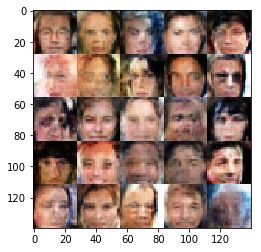

Epoch 1/1... Discriminator Loss: 0.6510... Generator Loss: 2.0864
Epoch 1/1... Discriminator Loss: 0.6474... Generator Loss: 2.0222
Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.3554
Epoch 1/1... Discriminator Loss: 0.5478... Generator Loss: 1.1310
Epoch 1/1... Discriminator Loss: 0.1244... Generator Loss: 3.4334
Epoch 1/1... Discriminator Loss: 0.0603... Generator Loss: 3.4360
Epoch 1/1... Discriminator Loss: 0.0325... Generator Loss: 4.4905
Epoch 1/1... Discriminator Loss: 0.4459... Generator Loss: 1.9761
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.6697
Epoch 1/1... Discriminator Loss: 0.7786... Generator Loss: 0.8201


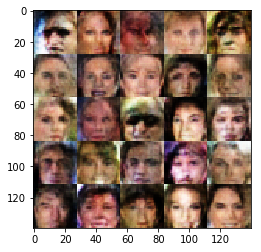

Epoch 1/1... Discriminator Loss: 0.6906... Generator Loss: 1.0455
Epoch 1/1... Discriminator Loss: 0.6573... Generator Loss: 1.3618
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 0.5023
Epoch 1/1... Discriminator Loss: 2.5353... Generator Loss: 0.1159
Epoch 1/1... Discriminator Loss: 0.3516... Generator Loss: 1.6481
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 3.1201
Epoch 1/1... Discriminator Loss: 1.0881... Generator Loss: 0.5941
Epoch 1/1... Discriminator Loss: 0.3029... Generator Loss: 1.5598
Epoch 1/1... Discriminator Loss: 0.1249... Generator Loss: 2.4440
Epoch 1/1... Discriminator Loss: 0.4834... Generator Loss: 2.1956


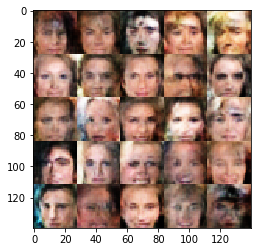

Epoch 1/1... Discriminator Loss: 0.2945... Generator Loss: 1.6251
Epoch 1/1... Discriminator Loss: 0.1831... Generator Loss: 2.0686
Epoch 1/1... Discriminator Loss: 0.8345... Generator Loss: 3.2220
Epoch 1/1... Discriminator Loss: 0.0699... Generator Loss: 3.6246
Epoch 1/1... Discriminator Loss: 0.0350... Generator Loss: 4.5165
Epoch 1/1... Discriminator Loss: 0.1299... Generator Loss: 5.8412
Epoch 1/1... Discriminator Loss: 0.0345... Generator Loss: 4.7149
Epoch 1/1... Discriminator Loss: 0.8982... Generator Loss: 1.9463
Epoch 1/1... Discriminator Loss: 0.4666... Generator Loss: 4.2729
Epoch 1/1... Discriminator Loss: 0.5746... Generator Loss: 1.0364


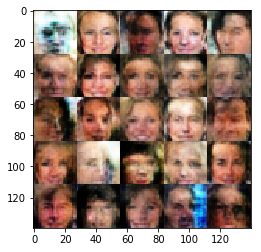

Epoch 1/1... Discriminator Loss: 0.1199... Generator Loss: 4.6473
Epoch 1/1... Discriminator Loss: 0.0674... Generator Loss: 3.5540
Epoch 1/1... Discriminator Loss: 0.0197... Generator Loss: 5.2335
Epoch 1/1... Discriminator Loss: 0.0207... Generator Loss: 6.5797
Epoch 1/1... Discriminator Loss: 0.0595... Generator Loss: 3.4792
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 6.7297
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 5.8681
Epoch 1/1... Discriminator Loss: 0.0129... Generator Loss: 7.1299
Epoch 1/1... Discriminator Loss: 0.7072... Generator Loss: 3.3304
Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 0.9128


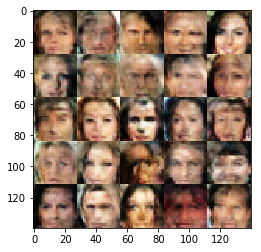

Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 0.4785... Generator Loss: 1.4572
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 2.8748... Generator Loss: 6.1268
Epoch 1/1... Discriminator Loss: 0.3577... Generator Loss: 2.9086
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.3977
Epoch 1/1... Discriminator Loss: 0.4022... Generator Loss: 2.1372
Epoch 1/1... Discriminator Loss: 0.6619... Generator Loss: 3.4780
Epoch 1/1... Discriminator Loss: 0.8064... Generator Loss: 2.9392
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 2.6695


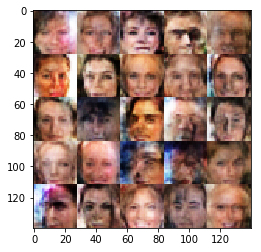

Epoch 1/1... Discriminator Loss: 0.3465... Generator Loss: 2.0371
Epoch 1/1... Discriminator Loss: 0.1942... Generator Loss: 3.5304
Epoch 1/1... Discriminator Loss: 0.1699... Generator Loss: 2.9239
Epoch 1/1... Discriminator Loss: 0.1007... Generator Loss: 2.9475
Epoch 1/1... Discriminator Loss: 0.2764... Generator Loss: 3.1629
Epoch 1/1... Discriminator Loss: 0.0736... Generator Loss: 4.9809
Epoch 1/1... Discriminator Loss: 2.8159... Generator Loss: 0.0817
Epoch 1/1... Discriminator Loss: 0.6265... Generator Loss: 1.0901
Epoch 1/1... Discriminator Loss: 1.8732... Generator Loss: 0.2299
Epoch 1/1... Discriminator Loss: 0.2940... Generator Loss: 1.9046


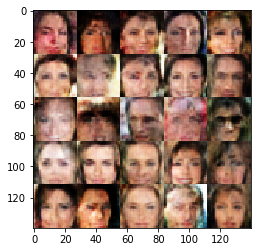

Epoch 1/1... Discriminator Loss: 0.2264... Generator Loss: 1.8580
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 0.5279
Epoch 1/1... Discriminator Loss: 0.1530... Generator Loss: 2.4139
Epoch 1/1... Discriminator Loss: 0.0849... Generator Loss: 3.0630
Epoch 1/1... Discriminator Loss: 0.0762... Generator Loss: 3.1568
Epoch 1/1... Discriminator Loss: 0.7462... Generator Loss: 2.3966
Epoch 1/1... Discriminator Loss: 0.4251... Generator Loss: 2.5677
Epoch 1/1... Discriminator Loss: 0.0591... Generator Loss: 3.3623
Epoch 1/1... Discriminator Loss: 1.5972... Generator Loss: 0.4048
Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 0.6981


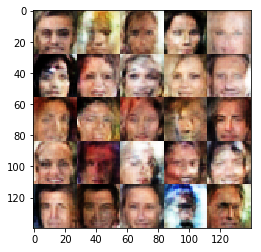

Epoch 1/1... Discriminator Loss: 0.1620... Generator Loss: 2.5474
Epoch 1/1... Discriminator Loss: 0.9942... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 0.4296... Generator Loss: 1.3417
Epoch 1/1... Discriminator Loss: 0.6644... Generator Loss: 0.9092
Epoch 1/1... Discriminator Loss: 0.1059... Generator Loss: 3.1857
Epoch 1/1... Discriminator Loss: 0.0331... Generator Loss: 5.3682
Epoch 1/1... Discriminator Loss: 0.0219... Generator Loss: 5.1462
Epoch 1/1... Discriminator Loss: 0.0299... Generator Loss: 5.8000
Epoch 1/1... Discriminator Loss: 0.0141... Generator Loss: 6.7113
Epoch 1/1... Discriminator Loss: 0.5646... Generator Loss: 1.2420


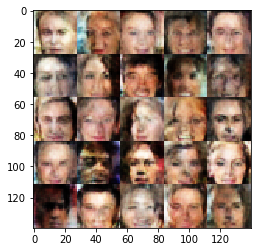

Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 3.6229
Epoch 1/1... Discriminator Loss: 0.7190... Generator Loss: 2.6681
Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 0.7347
Epoch 1/1... Discriminator Loss: 0.4167... Generator Loss: 2.4673
Epoch 1/1... Discriminator Loss: 0.5435... Generator Loss: 1.0538
Epoch 1/1... Discriminator Loss: 0.0404... Generator Loss: 4.8347
Epoch 1/1... Discriminator Loss: 2.6236... Generator Loss: 0.0903
Epoch 1/1... Discriminator Loss: 0.3960... Generator Loss: 2.2417
Epoch 1/1... Discriminator Loss: 0.3224... Generator Loss: 2.7692
Epoch 1/1... Discriminator Loss: 0.1012... Generator Loss: 3.3653


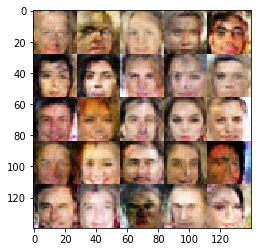

Epoch 1/1... Discriminator Loss: 0.4593... Generator Loss: 1.8469
Epoch 1/1... Discriminator Loss: 1.1425... Generator Loss: 0.4929
Epoch 1/1... Discriminator Loss: 1.0841... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 2.8135... Generator Loss: 0.1187
Epoch 1/1... Discriminator Loss: 0.2992... Generator Loss: 2.0974
Epoch 1/1... Discriminator Loss: 0.1062... Generator Loss: 4.1141
Epoch 1/1... Discriminator Loss: 0.4765... Generator Loss: 1.4787
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 1.6326
Epoch 1/1... Discriminator Loss: 0.0411... Generator Loss: 4.3760
Epoch 1/1... Discriminator Loss: 2.0964... Generator Loss: 0.2626


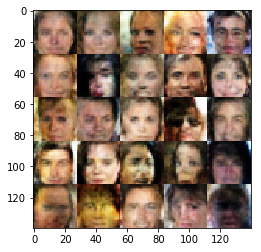

Epoch 1/1... Discriminator Loss: 0.0879... Generator Loss: 3.1772
Epoch 1/1... Discriminator Loss: 0.4223... Generator Loss: 1.5521
Epoch 1/1... Discriminator Loss: 0.1650... Generator Loss: 2.3070
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 6.6190
Epoch 1/1... Discriminator Loss: 0.0355... Generator Loss: 5.0336
Epoch 1/1... Discriminator Loss: 2.0459... Generator Loss: 4.4654
Epoch 1/1... Discriminator Loss: 0.2793... Generator Loss: 1.9255
Epoch 1/1... Discriminator Loss: 0.0894... Generator Loss: 2.8603
Epoch 1/1... Discriminator Loss: 0.0997... Generator Loss: 3.3932
Epoch 1/1... Discriminator Loss: 0.6736... Generator Loss: 1.2240


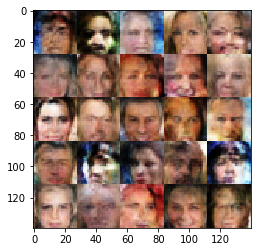

Epoch 1/1... Discriminator Loss: 0.2449... Generator Loss: 1.9287
Epoch 1/1... Discriminator Loss: 1.1245... Generator Loss: 4.9995
Epoch 1/1... Discriminator Loss: 0.0649... Generator Loss: 3.3304
Epoch 1/1... Discriminator Loss: 0.4521... Generator Loss: 2.7363
Epoch 1/1... Discriminator Loss: 0.0876... Generator Loss: 3.3422
Epoch 1/1... Discriminator Loss: 0.0568... Generator Loss: 3.9500
Epoch 1/1... Discriminator Loss: 0.0513... Generator Loss: 4.2078
Epoch 1/1... Discriminator Loss: 0.1231... Generator Loss: 2.5337
Epoch 1/1... Discriminator Loss: 0.1258... Generator Loss: 2.8690
Epoch 1/1... Discriminator Loss: 0.0336... Generator Loss: 5.6086


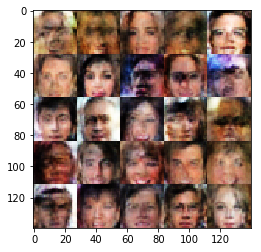

Epoch 1/1... Discriminator Loss: 0.0477... Generator Loss: 6.2586
Epoch 1/1... Discriminator Loss: 0.0346... Generator Loss: 4.2405
Epoch 1/1... Discriminator Loss: 3.2039... Generator Loss: 6.0651
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 1.3360
Epoch 1/1... Discriminator Loss: 0.2123... Generator Loss: 2.1344
Epoch 1/1... Discriminator Loss: 0.0741... Generator Loss: 3.1755
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 6.1169
Epoch 1/1... Discriminator Loss: 0.0487... Generator Loss: 4.4628
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 3.9086
Epoch 1/1... Discriminator Loss: 0.8615... Generator Loss: 0.7049


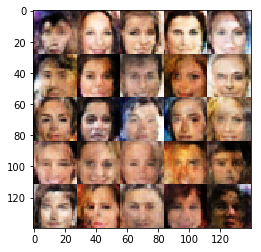

Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 1.7114
Epoch 1/1... Discriminator Loss: 0.0379... Generator Loss: 3.9140
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 0.7935
Epoch 1/1... Discriminator Loss: 0.8374... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 0.5200... Generator Loss: 1.3283
Epoch 1/1... Discriminator Loss: 0.4509... Generator Loss: 1.6957
Epoch 1/1... Discriminator Loss: 0.0563... Generator Loss: 3.8739
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.8876
Epoch 1/1... Discriminator Loss: 0.9176... Generator Loss: 2.5108
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 3.2928


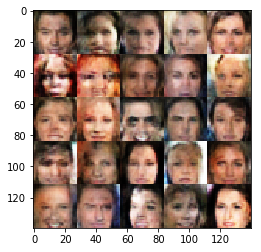

Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 1.0892
Epoch 1/1... Discriminator Loss: 0.4493... Generator Loss: 1.6230
Epoch 1/1... Discriminator Loss: 0.4306... Generator Loss: 1.7128
Epoch 1/1... Discriminator Loss: 0.5093... Generator Loss: 1.7374
Epoch 1/1... Discriminator Loss: 0.6557... Generator Loss: 2.7055
Epoch 1/1... Discriminator Loss: 0.5917... Generator Loss: 2.1912
Epoch 1/1... Discriminator Loss: 0.5145... Generator Loss: 1.4227
Epoch 1/1... Discriminator Loss: 1.9456... Generator Loss: 0.3291
Epoch 1/1... Discriminator Loss: 0.1219... Generator Loss: 3.6670
Epoch 1/1... Discriminator Loss: 0.1484... Generator Loss: 2.6590


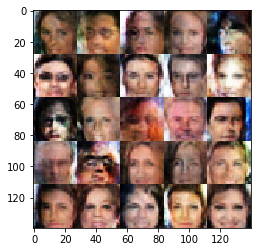

Epoch 1/1... Discriminator Loss: 1.5016... Generator Loss: 3.9863
Epoch 1/1... Discriminator Loss: 0.3280... Generator Loss: 1.8020
Epoch 1/1... Discriminator Loss: 0.4839... Generator Loss: 1.2305
Epoch 1/1... Discriminator Loss: 0.0498... Generator Loss: 4.0026
Epoch 1/1... Discriminator Loss: 0.2399... Generator Loss: 2.4358
Epoch 1/1... Discriminator Loss: 0.2535... Generator Loss: 5.2240
Epoch 1/1... Discriminator Loss: 0.8480... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 0.1186... Generator Loss: 4.1943
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.4629


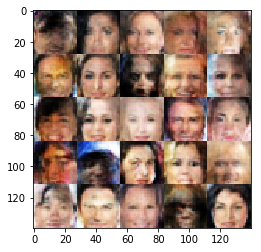

Epoch 1/1... Discriminator Loss: 0.7175... Generator Loss: 1.3610
Epoch 1/1... Discriminator Loss: 0.1914... Generator Loss: 3.5927
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 1.8129
Epoch 1/1... Discriminator Loss: 1.1498... Generator Loss: 4.0191
Epoch 1/1... Discriminator Loss: 0.0663... Generator Loss: 3.3990
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 3.0223
Epoch 1/1... Discriminator Loss: 0.4264... Generator Loss: 1.8550
Epoch 1/1... Discriminator Loss: 0.0847... Generator Loss: 3.2055
Epoch 1/1... Discriminator Loss: 1.1419... Generator Loss: 0.5514
Epoch 1/1... Discriminator Loss: 0.8882... Generator Loss: 0.7167


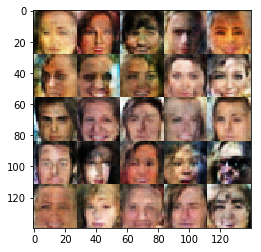

Epoch 1/1... Discriminator Loss: 0.2152... Generator Loss: 2.0209
Epoch 1/1... Discriminator Loss: 0.5950... Generator Loss: 3.7650
Epoch 1/1... Discriminator Loss: 0.0379... Generator Loss: 4.3907
Epoch 1/1... Discriminator Loss: 0.0507... Generator Loss: 4.1747
Epoch 1/1... Discriminator Loss: 0.0713... Generator Loss: 5.9217
Epoch 1/1... Discriminator Loss: 0.1143... Generator Loss: 2.8678
Epoch 1/1... Discriminator Loss: 0.2767... Generator Loss: 1.9804
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 4.2822
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 3.7967
Epoch 1/1... Discriminator Loss: 0.0454... Generator Loss: 4.4260


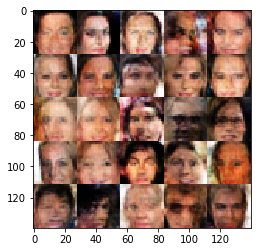

Epoch 1/1... Discriminator Loss: 0.6431... Generator Loss: 8.4466
Epoch 1/1... Discriminator Loss: 0.3754... Generator Loss: 1.6109
Epoch 1/1... Discriminator Loss: 0.0508... Generator Loss: 4.0944


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.